In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import RocCurveDisplay, roc_curve, ConfusionMatrixDisplay, confusion_matrix
import plotnine
from plotnine import ggplot, geom_point, aes, geom_line, geom_text, labs, xlab, ylab, theme_minimal

In [44]:
data = pd.read_csv('data/dataset_v2.txt', sep=" ", names=['timestamp','source_ID','destination_ID', 'Label'])
data

,timestamp,source_ID,destination_ID,Label
0,1,1,1,0
1,2,15,15,0
2,3,141,141,0
3,4,2,2,0
4,5,1,2,1
...,...,...,...,...
61728,3389,1899,1847,1
61729,3389,1899,1097,1
61730,3389,1899,277,1
61731,3389,1878,1624,1


In [45]:
#with open('result/score.txt', 'r') as f:
 #   lines = [line.strip('\n') for line in f.readlines()]


y_pred  = pd.read_csv('result3/score2.txt', sep=" ", names=['Prediction'])
y_pred

,Prediction
0,120.000000
1,120.000000
2,120.000000
3,120.000000
4,120.000000
...,...
61643,397.545286
61644,397.545286
61645,397.545286
61646,795.090571


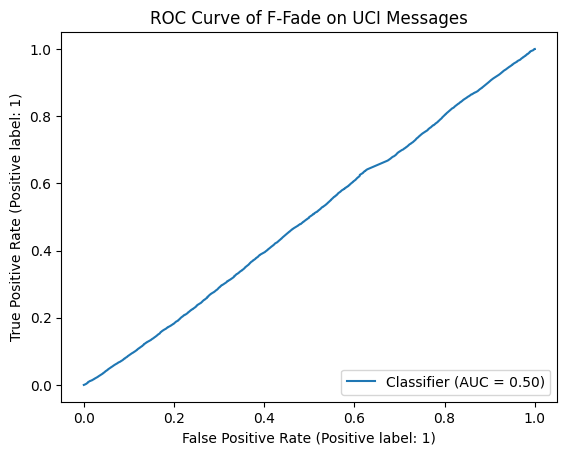

In [56]:
data_true=data[-len(y_pred):] #only select data that are predicted (after tsetup)
RocCurveDisplay.from_predictions(data_true['Label'], y_pred['Prediction'])
plt.title('ROC Curve of F-Fade on UCI Messages')
#plt.plot([0,1], [0,1])
plt.show()

In [47]:
fpr, tpr, thresholds = roc_curve(data_true['Label'], y_pred['Prediction'], pos_label = 1)

Best Threshold: 189.2017 with G-Mean: 0.4999
FPR: 0.4993, TPR: 0.4991


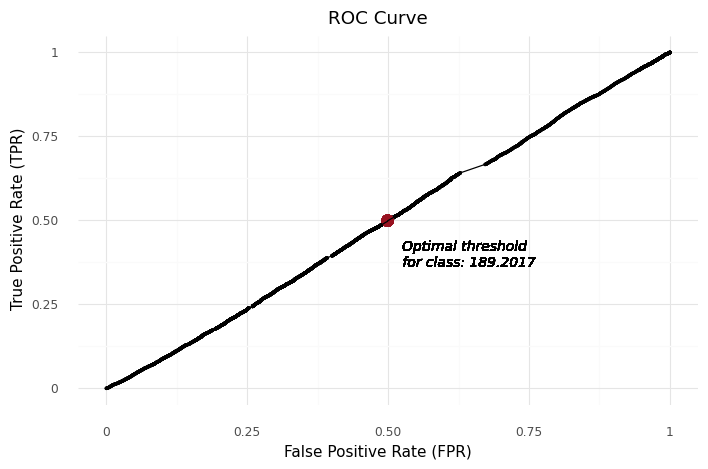

<ggplot: (8774425182407)>

In [48]:
# Calculate the G-mean
gmean = np.sqrt(tpr * (1 - fpr))
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

# Create data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

In [49]:
data_true['Prediction'] = np.where(y_pred['Prediction']<3507.5758, 0, 1)

data_true['Prediction'].value_counts()

/tmp/ipykernel_3400/805051330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0    61164
1      484
Name: Prediction, dtype: int64

In [50]:
confusion_matrix(data_true['Label'], data_true['Prediction'])

array([[27799,   249],
       [33365,   235]])

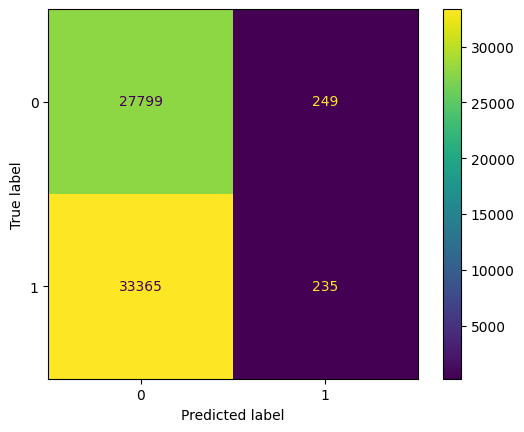

In [51]:
ConfusionMatrixDisplay.from_predictions(data_true['Label'], data_true['Prediction'])

In [52]:
TPR=2348710/(387504+2348710)
FPR=44787/(1594228+44787)
print(f'TPR {TPR}')
print(f'FPR {FPR}')

TPR 0.8583794980948127
FPR 0.027325558338392265


In [53]:
data_true['Label'].value_counts(normalize=True)

1    0.54503
0    0.45497
Name: Label, dtype: float64

In [54]:
data['Label'].value_counts(normalize=True)

1    0.544377
0    0.455623
Name: Label, dtype: float64

In [55]:
data_true['Prediction'].value_counts(normalize=True)

0    0.992149
1    0.007851
Name: Prediction, dtype: float64